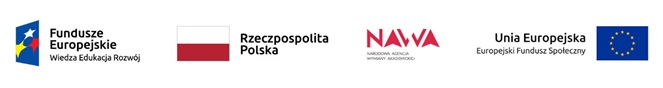

# Security of Big Data Analitics 

### Laboratory 06 "Analysis of data sets using artificial intelligence mechanisms"

#### Marcel Mróz 144654

-------------------------------------------------------------------------------------------------------
###### The MNIST dataset was used in this exercise. This is one of the most popular datasets used for machine learning. It contains images of handwritten numbers (0-9) in a 28x28 pixel format.

The MNIST dataset consists of 60,000 training images and 10,000 test images. These images were collected from a variety of documents such as postal letters and identification cards. This collection is often used as a benchmark to test various machine learning algorithms, especially in the field of image classification.

The MNIST collection is relatively simple but still challenging to learn and can be a good starting point for people who want to learn how machine learning works in practice. It is often used in computer science as an example for learning image classification and neural networks. Details can be found on the website:  http://yann.lecun.com/exdb/mnist/

-------------------------------------------------------------------------------------------------------

To use the mentioned dataset you need to:

1. Import of required libraries


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Answer the questions:

1.1) What is the tensorflow library used for?

TensorFlow is an open-source software library for machine learning and artificial intelligence. It is particularly well-suited for deep learning, a subset of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. TensorFlow is used for tasks like image and speech recognition, natural language processing, and time-series analysis.



1.2) What is the numpy library used for?

NumPy (Numerical Python) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. It's extensively used for scientific computing and data manipulation and is especially useful in handling numerical data for machine learning tasks.



1.3) What is the matplotlib library used for?

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension, NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. Matplotlib is widely used for data visualization to create graphs and charts, aiding in the analysis and presentation of data.



------------------------------------------------------------------------------------------------------

your conclusions (if not active click twice):


2. Load training and test data

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


------------------------------------------------------------------------------------------------------
If you do not have a locally saved copy of this dataset, it will be downloaded - which can take up to a few minutes - a corresponding message will be displayed. If you have previously downloaded this dataset it will be loaded without an additional message

The training data will be loaded into the variables:

- training data: train_images (images), train_labels (labels)

- test data: test_images (images), test_labels (labels)

To display the sample images of the figures (according to number_printed_fig variable value), use the code from the cell below. It allows you to display analysed graphics showing manually written digits and their assigned labels - five per line

------------------------------------------------------------------------------------------------------

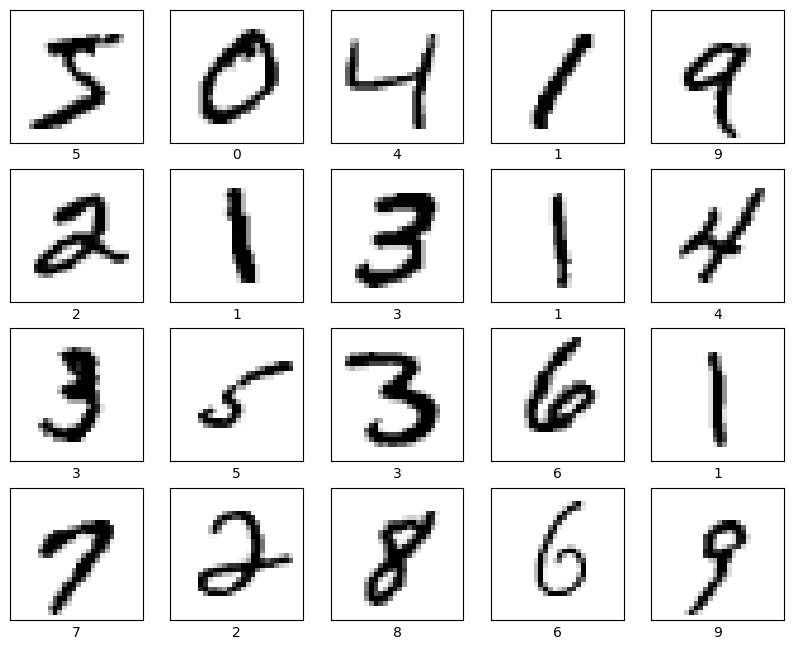

In [7]:
# number plotted figures 
number_printed_fig = 20

plt.figure(figsize=(10,10))
for i in range(number_printed_fig):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------
3. Normalisation

Data normalisation is the process of transforming input data so that it falls within a specified range of values. For neural networks, where weights are updated based on input values, data normalisation can help improve the performance and accuracy of the network.

In image classification, the pixel values of images are usually represented as integers from 0 to 255. Data normalisation involves dividing the pixel values by the maximum value (255 in this case) so that the pixel values fall within the range of 0 to 1.

In the code, the training and test data (train_images and test_images) are normalised by dividing by 255 so that the pixel values fall between 0 and 1:

------------------------------------------------------------------------------------------------------

In [8]:
# copy of first number 
train_image_0 = train_images[0]
train_label_0 = train_labels[0]

#normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

# copy of first number after normalisation
train_image_0_norm = train_images[0]
train_label_0_norm = train_labels[0]

------------------------------------------------------------------------------------------------------
Answer the questions:

3.1 Are the images before and after normalisation different?

Normalization is a preprocessing step typically used to scale the pixel values of images. For images, this usually means scaling the pixel values to be between 0 and 1 which helps the convergence of training the model. The images before and after normalization will look the same visually, but their pixel value ranges will be different. Before normalization, pixel values range from 0 to 255 (for 8-bit grayscale images). After normalization, they will range from 0 to 1.



3.2 Display a single image as a matrix (print(train_image_0), print(train_image_0_norm)) and compare the values. To be sure it is the same digit modify the code to display the digit images and assess the differences visually.


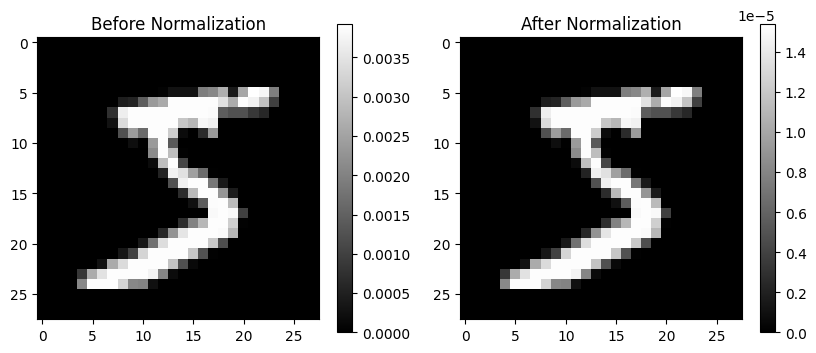

In [11]:
# Assuming 'train_images' is your dataset
# Make a copy of the first image before normalization
train_image_0 = train_images[0].copy()

# Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

# Copy of the first number after normalization
train_image_0_norm = train_images[0]

# Display the first image in the dataset before and after normalization
plt.figure(figsize=(10, 4))

# Before Normalization
plt.subplot(1, 2, 1)
plt.imshow(train_image_0, cmap='gray')
plt.title('Before Normalization')
plt.colorbar()

# After Normalization
plt.subplot(1, 2, 2)
plt.imshow(train_image_0_norm, cmap='gray')
plt.title('After Normalization')
plt.colorbar()

plt.show()

# # Print the matrix values before normalization
# print("Matrix values before normalization:")
# print(train_image_0)

# # Print the matrix values after normalization
# print("\nMatrix values after normalization:")
# print(train_image_0_norm)


---------------------
4. Model definition

Creating a neural network model using the Keras library. Keras is a high-level library for building and training neural networks in Python.

To create a model, you first need to define the architecture of the neural network, i.e. how the layers of the network are connected. In this case, I used a simple model consisting of three dense layers. The first layer is a 28x28 pixel input layer that processes the input data. The second layer is a hidden layer with 128 neurons and a relu activation function that processes the output from the input layer. The third layer is the output layer with 10 neurons, representing individual classes, and a softmax activation function that normalises the output to a probability distribution.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

----------------------
5. Model compilation

Then, to compile the model, you need to specify the loss function, optimiser and metrics that will be used when training the model. In this case, I used the loss function 'sparse_categorical_crossentropy', the optimiser 'adam' and the metric 'accuracy'. 

An optimiser (optimizer) is an algorithm used during the machine learning process that aims to minimise the loss function (loss function) by adjusting the model weights. The loss function determines how well the model performs in predicting correct values from the input data.

Optimisation algorithms use the gradient of the loss function to determine the direction in which the model weights should be changed to minimise the value of the loss function. There are a number of different optimisation algorithms that differ in the way the weights are updated.

sparse_categorical_crossentropy is a cost function that is often used in multiclass classification tasks.

In multi-class classification, the goal is to assign a given object to one of many classes. The cost function is used to assess the quality of the model's prediction, i.e. how well the model performs in predicting the correct class for a given object.

The accuracy (precision) metric is one of the simplest and most commonly used indicators of model performance in machine learning. It measures how well the model performs in predicting classes for test data. Accuracy is the ratio of the number of correct predictions to the total number of predictions, i.e:

accuracy = number of correct predictions / total number of predictions

For example, if the model is designed to recognise the handwritten digits 0 to 9, and it correctly predicts 95 out of 100 digits on the test set, the accuracy is 95/100, i.e. 0.95 or 95%.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

-----------------------------
6 Model training

Model training is the process by which the model is adapted to the learning data. The aim of training is to minimise the cost function, a measure of the error between the true labels and the model's predictions. During training, the model is presented with a set of learning data and then fitted to this data by changing the weights in the neural network. This process is repeated for each training iteration, called an epoch.

To minimise the cost function, in each training iteration, the model calculates the values of the gradient of the cost function against the weights. The gradient indicates the direction of the fastest growth of the function, so to minimise the cost function, the model weights are updated in the opposite direction of the gradient. The rate at which the weights are updated is controlled by a hyperparameter called the learning rate. Getting the hyperparameters right is important for the model to be effective and generalise well on new data.

In [14]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4


1875/1875 [==============================] - 10s 4ms/step - loss: 2.3015 - accuracy: 0.1118
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3009 - accuracy: 0.1121
Epoch 3/4
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2994 - accuracy: 0.1125
Epoch 4/4
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2950 - accuracy: 0.1156


--------------------------
7.  Testing the model

The function model.evaluate(test_images, test_labels, verbose=2) is used to evaluate performance on the test set. It takes two arguments:

- test_images - the test set of images
- test_labels - a test set of labels (classes) that correspond to each image in test_images

The function returns two values:

- the value of the cost function (loss) on the test set
- the value of a metric (metrics), specified during model compilation, on the test set. The default is accuracy (precision).

The verbose argument specifies the level of detail of the output. If you set verbose=2, the function will only output information about the number of test samples and the loss and accuracy values.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n dane testowe - accuracy:', test_acc)
print('\n dane testowe - loss:', test_loss)

313/313 - 1s - loss: 2.2906 - accuracy: 0.1135 - 1s/epoch - 4ms/step

 dane testowe - accuracy: 0.11349999904632568

 dane testowe - loss: 2.290616989135742


# Exercise 1 
Create a graph showing the value of the accuracy parameter as a function of the number of epochs (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)


Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2613 - accuracy: 0.9256 - val_loss: 0.1318 - val_accuracy: 0.9612
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1063 - accuracy: 0.9682 - val_loss: 0.0904 - val_accuracy: 0.9720
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0702 - accuracy: 0.9790 - val_loss: 0.0689 - val_accuracy: 0.9787
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0508 - accuracy: 0.9851 - val_loss: 0.0685 - val_accuracy: 0.9776
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0760 - val_accuracy: 0.9764
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0689 - val_accuracy: 0.9770
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0627 - val_accuracy: 0.9802
Epoch

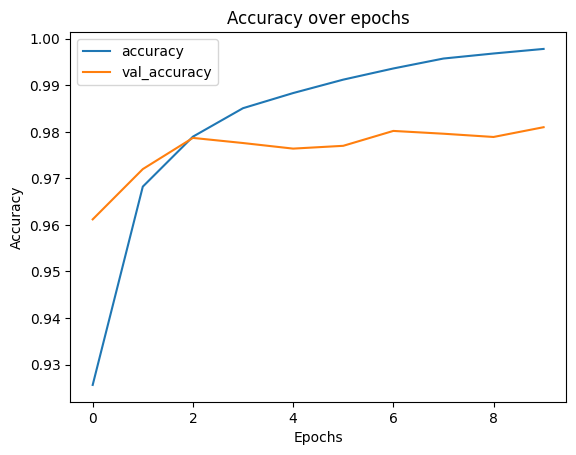

In [19]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# Plotting the accuracy
plt.plot(history.epoch, history.history['accuracy'], label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




## Conclusions from Model Training

- **High Training Accuracy**: The training accuracy is increasing with each epoch, which indicates that the model is learning and improving its predictions on the training set.

- **Validation Accuracy Plateau**: The validation accuracy initially increases but then plateaus and even starts to decrease slightly. This suggests that the model might be overfitting to the training data. Overfitting occurs when a model learns patterns that are specific to the training set, which do not generalize well to new, unseen data.

- **Potential for Early Stopping**: Given that the validation accuracy stops improving after a certain number of epochs, implementing early stopping could be beneficial. Early stopping is a regularization technique used to prevent overfitting by halting the training process if the validation accuracy fails to improve for a predetermined number of epochs.


# Exercise 2 
Create a graph showing the value of the loss parameter as a function of the number of epochs

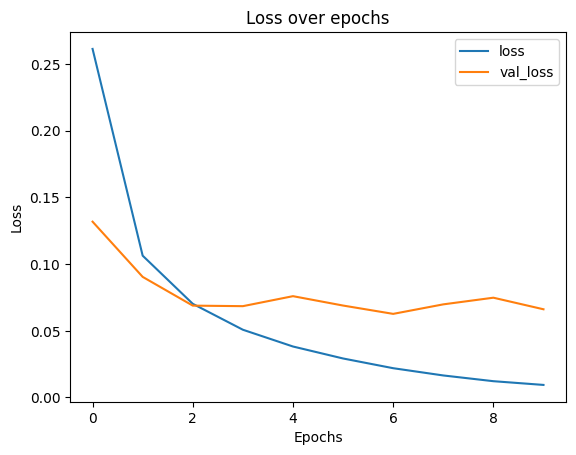

In [20]:
# Plotting the loss
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Loss Analysis

- **Decreasing Training Loss**: The training loss drops sharply and continues to decrease, which indicates that the model is effectively learning from the training data over time.

- **Validation Loss Trends**: The validation loss decreases alongside the training loss initially but then begins to level off. This leveling off, while not increasing, suggests the model is not significantly overfitting. However, it's also not improving in terms of validation loss, which might indicate the model has learned as much as it can from the data provided, or it requires further tuning.

- **Model Performance**: The convergence of training and validation loss suggests that the model is generalizing well. The slight gap between the two indicates a good fit, not too overfitted or underfitted to the training data.

# Exercise 3
Find out which other optimisers can be used to compile the model, choose one and produce graphs for the accuracy and loss parameters. Which optimiser is better (i.e. which needs fewer epochs)?

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.2651 - accuracy: 0.9237 - val_loss: 0.1255 - val_accuracy: 0.9636
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1073 - accuracy: 0.9686 - val_loss: 0.0952 - val_accuracy: 0.9698
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0700 - accuracy: 0.9793 - val_loss: 0.0750 - val_accuracy: 0.9773
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0506 - accuracy: 0.9852 - val_loss: 0.0711 - val_accuracy: 0.9792
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0691 - val_accuracy: 0.9792
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0742 - val_accuracy: 0.9766
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.0625 - val_accuracy: 0.9814
Epo

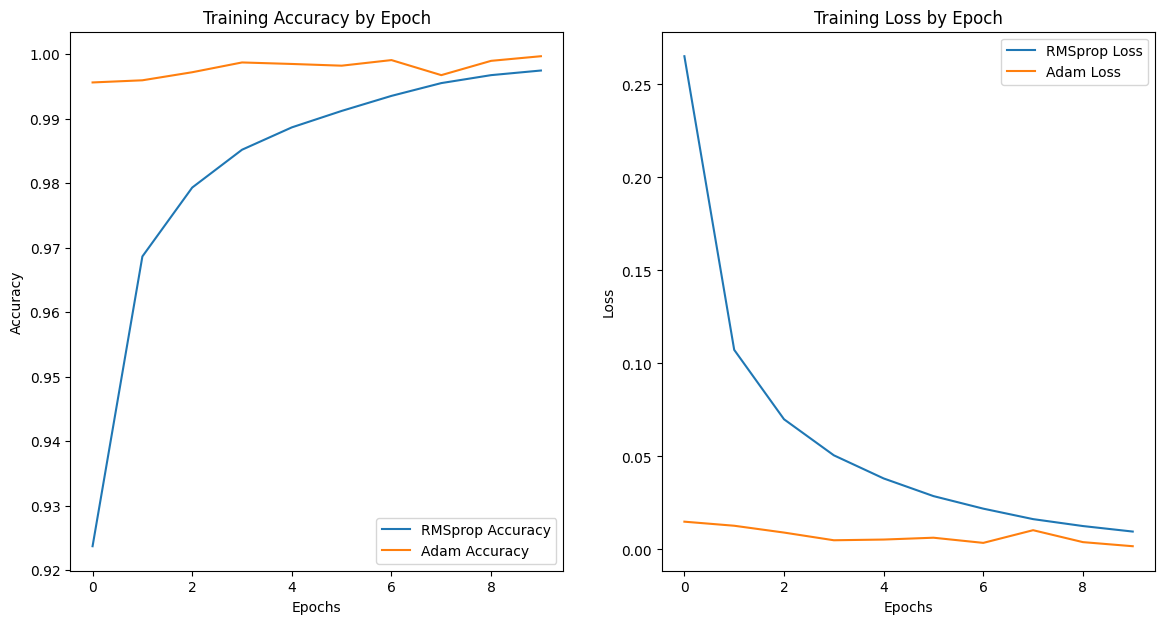

In [21]:
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt

# Define the model architecture
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with the first optimizer
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the first optimizer
history_rmsprop = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# Compile the model with the second optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the second optimizer
history_adam = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# Plotting the accuracy for both optimizers
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_rmsprop.epoch, history_rmsprop.history['accuracy'], label='RMSprop Accuracy')
plt.plot(history_adam.epoch, history_adam.history['accuracy'], label='Adam Accuracy')
plt.title('Training Accuracy by Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss for both optimizers
plt.subplot(1, 2, 2)
plt.plot(history_rmsprop.epoch, history_rmsprop.history['loss'], label='RMSprop Loss')
plt.plot(history_adam.epoch, history_adam.history['loss'], label='Adam Loss')
plt.title('Training Loss by Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Comparison of RMSprop and Adam Optimizers

### Training Accuracy by Epoch:
- Both RMSprop and Adam optimizers achieve high accuracy on the training set, with Adam slightly outperforming RMSprop after the initial epochs.
- The accuracy of both optimizers increases as the number of epochs grows, suggesting that both are effectively learning from the training data.

### Training Loss by Epoch:
- RMSprop shows a sharper initial decrease in training loss, but as epochs increase, Adam optimizer demonstrates a steadier and more consistent decrease in loss.
- Adam's loss continues to decline over epochs, while RMSprop's loss plateaus and exhibits some fluctuation, which may indicate less stability in the convergence.

### Overall Conclusion:
- Adam appears to be the more effective optimizer for this specific training run as it achieves slightly higher accuracy and lower loss compared to RMSprop.
- The steadiness of the loss decrease with Adam suggests it may be more stable for this model and dataset.


## Answer the questions:

1. How can the presented image detection process be interfered with?

Image detection or classification processes can be interfered with through various means such as adversarial attacks, where slight, often imperceptible, perturbations are added to the input images to mislead the model.



2. Can it be defended against?

Defenses against such attacks include adversarial training (where the model is trained with adversarial examples), regularization techniques, and using models that inherently have some robustness to adversarial perturbations.

